In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import numpy as np

In [75]:
from keras.datasets import mnist
data = tf.keras.datasets.fashion_mnist.load_data()

In [77]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

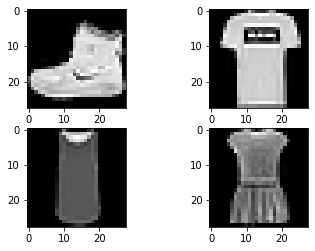

In [78]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()


In [79]:
x_train[0].shape

(28, 28)

In [81]:
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32')

In [83]:
x_train = x_train / 255
x_test = x_test / 255

In [84]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [86]:
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu')) #hidden layer 1
model.add(Dense(64, activation='relu'))                    #hidden layer 2
model.add(Dense(128, activation='relu'))                   #hidden layer 3
model.add(Dense(256, activation='relu'))                   #hidden layer 4
model.add(Dense(512, activation='relu'))                   #hidden layer 5
model.add(Dense(10, activation='softmax'))                 #output layer 1

In [88]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 205,290
Trainable params: 205,290
Non-trainable params: 0
________________________________________________

In [92]:
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=100)

Epoch 1/10
480/480 [==============================] - 4s 7ms/step - loss: 1.4000 - accuracy: 0.4456 - val_loss: 0.7838 - val_accuracy: 0.6956
Epoch 2/10
480/480 [==============================] - 3s 7ms/step - loss: 0.7097 - accuracy: 0.7318 - val_loss: 0.6464 - val_accuracy: 0.7578
Epoch 3/10
480/480 [==============================] - 3s 7ms/step - loss: 0.6428 - accuracy: 0.7587 - val_loss: 0.6038 - val_accuracy: 0.7762
Epoch 4/10
480/480 [==============================] - 3s 7ms/step - loss: 0.5920 - accuracy: 0.7779 - val_loss: 0.5499 - val_accuracy: 0.7977
Epoch 5/10
480/480 [==============================] - 3s 7ms/step - loss: 0.5452 - accuracy: 0.7993 - val_loss: 0.5485 - val_accuracy: 0.8018
Epoch 6/10
480/480 [==============================] - 3s 7ms/step - loss: 0.5237 - accuracy: 0.8100 - val_loss: 0.5262 - val_accuracy: 0.8093
Epoch 7/10
480/480 [==============================] - 3s 7ms/step - loss: 0.4984 - accuracy: 0.8216 - val_loss: 0.5105 - val_accuracy: 0.8136
Epoch 

In [93]:
scores = model.evaluate(x_test, y_test)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8364
[0.44723066687583923, 0.8363999724388123]


In [94]:
predictions=model.predict(x_test)
label=[]
for pred in predictions:
  max_vel=max(pred)
  for (i,p) in enumerate(pred):
    if(p==max_vel):
      label.append(i)

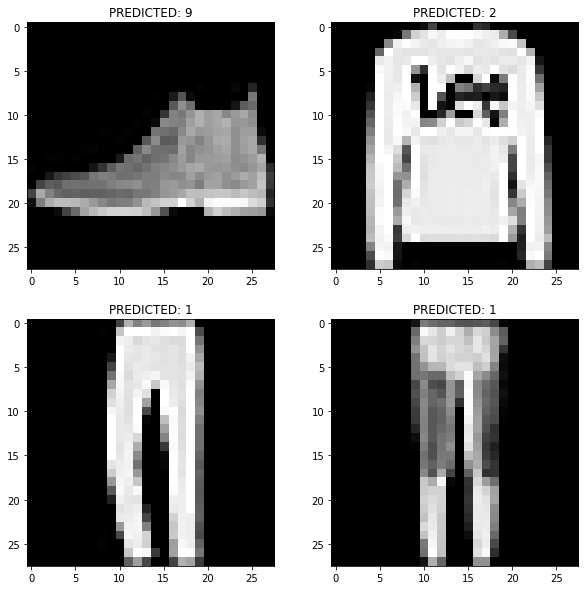

In [95]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(x_test[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[0]}')
plt.subplot(222)
plt.imshow(x_test[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[1]}')
plt.subplot(223)
plt.imshow(x_test[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[2]}')
plt.subplot(224)
plt.imshow(x_test[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[3]}')
plt.show()